In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Case Rigshospitalet.csv')

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_8168\2232811804.py:1: DtypeWarning: Columns (9,13,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Case Rigshospitalet.csv')


In [3]:
df.head()

,Patient ID,Patientkontakt ID,Patient alder på kontaktstart tidspunkt,Kontakt startdato,Kontakt slutdato,Kontakttype,Indlæggelsesmåde,Patientkontakttype,Aktionsdiagnosekode,Bidiagnosekode,...,Procedure udført,Behandlingskontakt ID,Besøgstype,Patient køn,Patient civilstand,Patient oprettet på Min SP (J/N),Patient land,Patient region,Patient postnummer,Patient kommune
0,Z4115614,1301023075465,0,"2023-01-13 12:32:00,000","2023-01-13 13:02:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-13 12:32:00,000",176.794.528,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
1,Z4115614,1301023121831,0,"2023-01-15 13:27:00,000","2023-01-15 13:57:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-15 13:27:00,000",177.035.032,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
2,Z4119225,1301023357249,0,"2023-01-30 10:20:00,000","2023-01-30 10:50:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-01-30 10:20:00,000",178.269.449,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
3,Z4127033,1301023443807,0,"2023-02-04 12:46:00,000","2023-02-04 13:16:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-02-04 12:46:00,000",178.703.583,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København
4,Z4127033,1301023443875,0,"2023-02-05 12:22:00,000","2023-02-05 12:52:00,000",Fysisk fremmøde,Planlagt,2 Ambulant,DZ001,NaN,...,"2023-02-05 12:22:00,000",178.703.779,OBST EFTERFØDSEL 30,Mand,Ugift,J,Danmark,Hovedstaden (84),2100,København


In [4]:
len(df)

4658066

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658066 entries, 0 to 4658065
Data columns (total 24 columns):
 #   Column                                   Dtype 
---  ------                                   ----- 
 0   Patient ID                               object
 1   Patientkontakt ID                        int64 
 2   Patient alder på kontaktstart tidspunkt  int64 
 3   Kontakt startdato                        object
 4   Kontakt slutdato                         object
 5   Kontakttype                              object
 6   Indlæggelsesmåde                         object
 7   Patientkontakttype                       object
 8   Aktionsdiagnosekode                      object
 9   Bidiagnosekode                           object
 10  Behandlingsansvarlig Afdeling            object
 11  Kontakt varighed (timer)                 object
 12  Procedure-kode                           object
 13  Procedure-tillægskoder                   object
 14  Procedure udført                  

In [6]:
# Missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Patient ID                     46
Aktionsdiagnosekode           352
Bidiagnosekode            3447671
Procedure-kode              51200
Procedure-tillægskoder    2970364
Procedure udført            51203
Besøgstype                 691308
Patient køn                    46
Patient civilstand          10117
Patient land                15063
Patient region              14572
Patient postnummer          33535
Patient kommune             14052
dtype: int64


In [7]:
# Duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [8]:
# Summary statistics of numerical columns
print(df.describe())

       Patientkontakt ID  Patient alder på kontaktstart tidspunkt
count       4.658066e+06                             4.658066e+06
mean        1.323593e+12                             4.920980e+01
std         1.060205e+11                             2.518292e+01
min         2.048914e+06                             0.000000e+00
25%         1.301025e+12                             3.000000e+01
50%         1.301028e+12                             5.100000e+01
75%         1.301031e+12                             7.200000e+01
max         3.800040e+12                             1.080000e+02


In [9]:
# Unique patients
unique_patients = df["Patient ID"].nunique()
print(f"Unique patients: {unique_patients}")

Unique patients: 331762


In [10]:
# Unique appointments
unique_appointments = df["Patientkontakt ID"].nunique()
print(f"Unique appointments: {unique_appointments}")

Unique appointments: 1821200


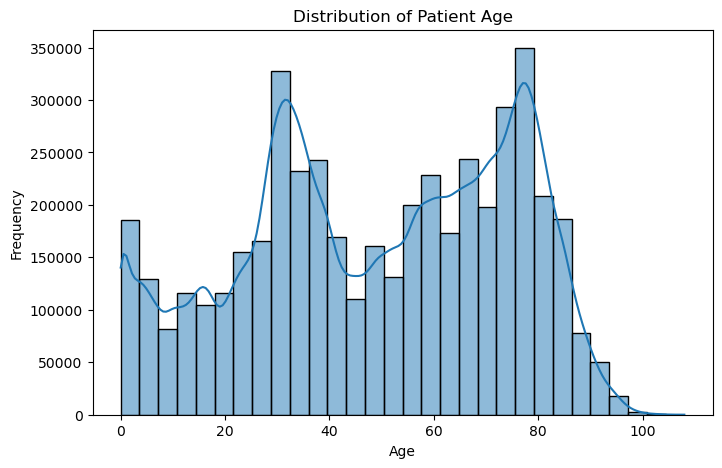

In [11]:
# Distribution of patient age
plt.figure(figsize=(8,5))
sns.histplot(df["Patient alder på kontaktstart tidspunkt"], bins=30, kde=True)
plt.title("Distribution of Patient Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Create new column with visit duration in minutes
df["Kontakt startdato"] = pd.to_datetime(df["Kontakt startdato"], errors='coerce')
df["Kontakt slutdato"] = pd.to_datetime(df["Kontakt slutdato"], errors='coerce')
df["Visit Duration (minutes)"] = (df["Kontakt slutdato"] - df["Kontakt startdato"]).dt.total_seconds() / 60
print(df[["Kontakt startdato", "Kontakt slutdato", "Visit Duration (minutes)"]].head())

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_8168\321040519.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Kontakt startdato"] = pd.to_datetime(df["Kontakt startdato"], errors='coerce')
C:\Users\Nazareno\AppData\Local\Temp\ipykernel_8168\321040519.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Kontakt slutdato"] = pd.to_datetime(df["Kontakt slutdato"], errors='coerce')


    Kontakt startdato    Kontakt slutdato  Visit Duration (minutes)
0 2023-01-13 12:32:00 2023-01-13 13:02:00                      30.0
1 2023-01-15 13:27:00 2023-01-15 13:57:00                      30.0
2 2023-01-30 10:20:00 2023-01-30 10:50:00                      30.0
3 2023-02-04 12:46:00 2023-02-04 13:16:00                      30.0
4 2023-02-05 12:22:00 2023-02-05 12:52:00                      30.0


In [14]:
# Create a dataset grouped by patient
patient_df = df.groupby("Patient ID").agg(
    Number_of_Visits=("Visit Duration (minutes)", "count"),
    Total_Visit_Time=("Visit Duration (minutes)", "sum"),
    Mean_Visit_Time=("Visit Duration (minutes)", "mean"),
    Min_Visit_Time=("Visit Duration (minutes)", "min"),
    Max_Visit_Time=("Visit Duration (minutes)", "max"),
    Age=("Patient alder på kontaktstart tidspunkt", "first"),  # Assuming age is consistent
    Gender=("Patient køn", "first"),  # Assuming gender is consistent
    Region=("Patient region", "first"),  # Useful for geographical insights
    Primary_Diagnosis=("Aktionsdiagnosekode", lambda x: x.mode()[0] if not x.isna().all() else None)  # Most common diagnosis
).reset_index()
print(patient_df.head())

  Patient ID  Number_of_Visits  Total_Visit_Time  Mean_Visit_Time  \
0       Z100                 2              99.0             49.5   
1   Z1000004                 1              19.0             19.0   
2   Z1000010                10            1549.0            154.9   
3   Z1000018                 4             276.0             69.0   
4   Z1000021                 3             174.0             58.0   

   Min_Visit_Time  Max_Visit_Time  Age  Gender            Region  \
0            42.0            57.0   50  Kvinde  Hovedstaden (84)   
1            19.0            19.0   32    Mand  Hovedstaden (84)   
2            29.0           261.0   45    Mand  Hovedstaden (84)   
3            45.0           141.0   44    Mand     Sjælland (85)   
4            58.0            58.0   12    Mand  Hovedstaden (84)   

  Primary_Diagnosis  
0             DM059  
1            DG930A  
2            DM511D  
3             DQ253  
4             DQ212  


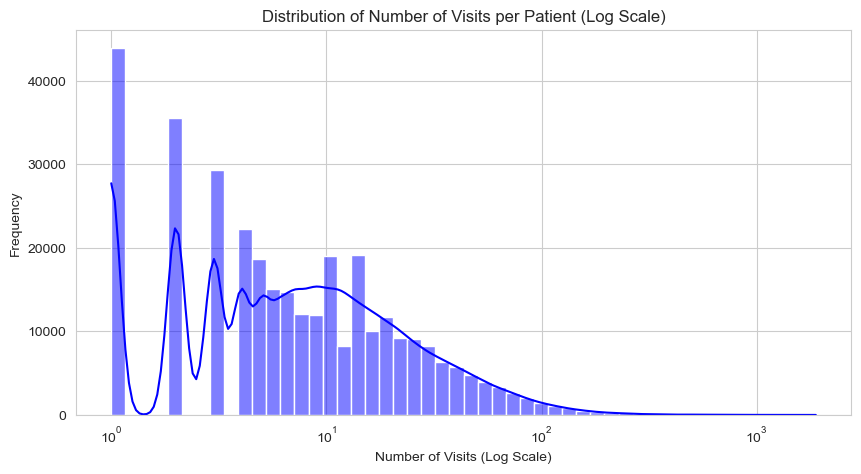

In [23]:
# 1. Distribution of Number of Visits per Patient (Log Scale)
plt.figure(figsize=(10, 5))
sns.histplot(patient_df["Number_of_Visits"], bins=50, kde=True, color='blue', log_scale=(True, False))
plt.title("Distribution of Number of Visits per Patient (Log Scale)")
plt.xlabel("Number of Visits (Log Scale)")
plt.ylabel("Frequency")
plt.show()

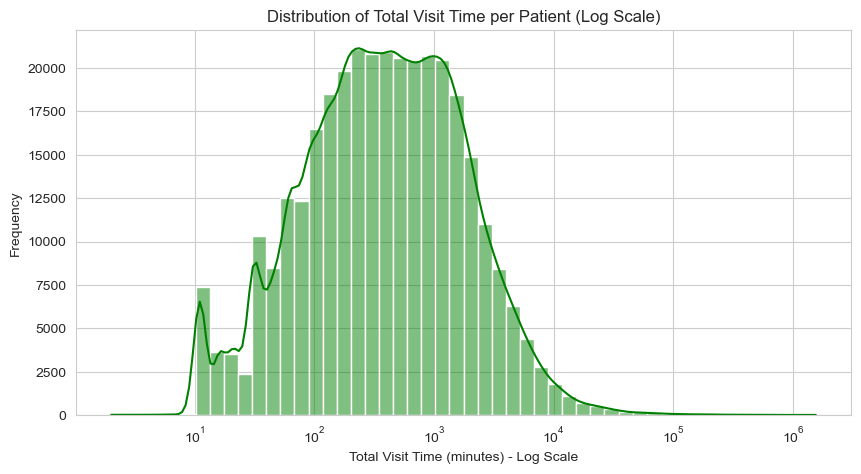

In [24]:
# 2. Distribution of Total Visit Time (Log Scale)
plt.figure(figsize=(10, 5))
sns.histplot(patient_df["Total_Visit_Time"] + 1, bins=50, kde=True, color='green', log_scale=(True, False))  # +1 to avoid log(0)
plt.title("Distribution of Total Visit Time per Patient (Log Scale)")
plt.xlabel("Total Visit Time (minutes) - Log Scale")
plt.ylabel("Frequency")
plt.show()

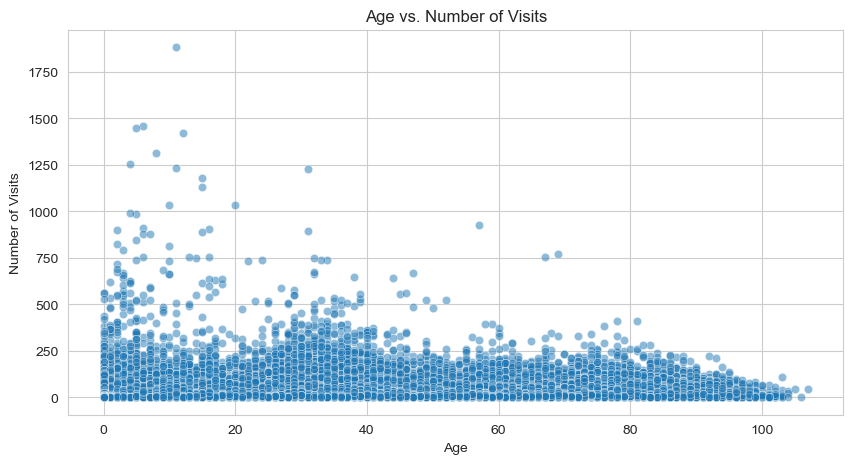

In [19]:
# 3. Scatter Plot: Age vs. Number of Visits
plt.figure(figsize=(10, 5))
sns.scatterplot(x=patient_df["Age"], y=patient_df["Number_of_Visits"], alpha=0.5)
plt.title("Age vs. Number of Visits")
plt.xlabel("Age")
plt.ylabel("Number of Visits")
plt.show()

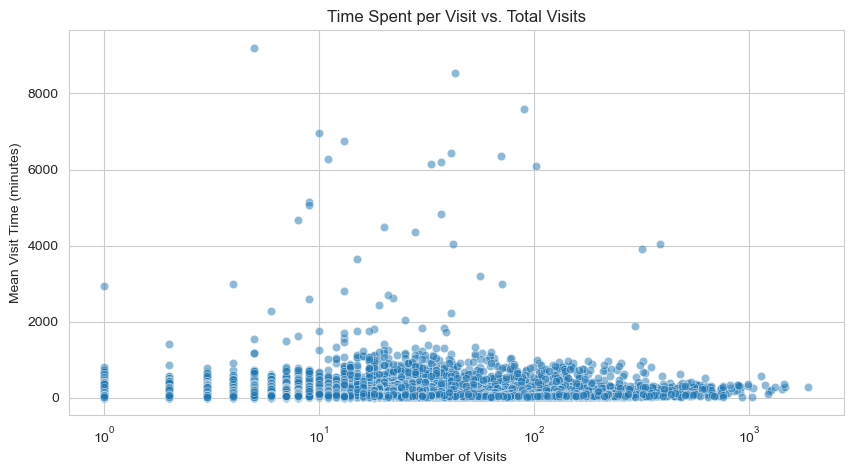

In [25]:
# 4. Time Spent per Visit vs. Total Visits
plt.figure(figsize=(10, 5))
sns.scatterplot(x=patient_df["Number_of_Visits"], y=patient_df["Mean_Visit_Time"], alpha=0.5)
plt.title("Time Spent per Visit vs. Total Visits")
plt.xlabel("Number of Visits")
plt.ylabel("Mean Visit Time (minutes)")
plt.xscale("log")
plt.show()

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_8168\3800173333.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_means.index, y=region_means.values, palette="viridis")


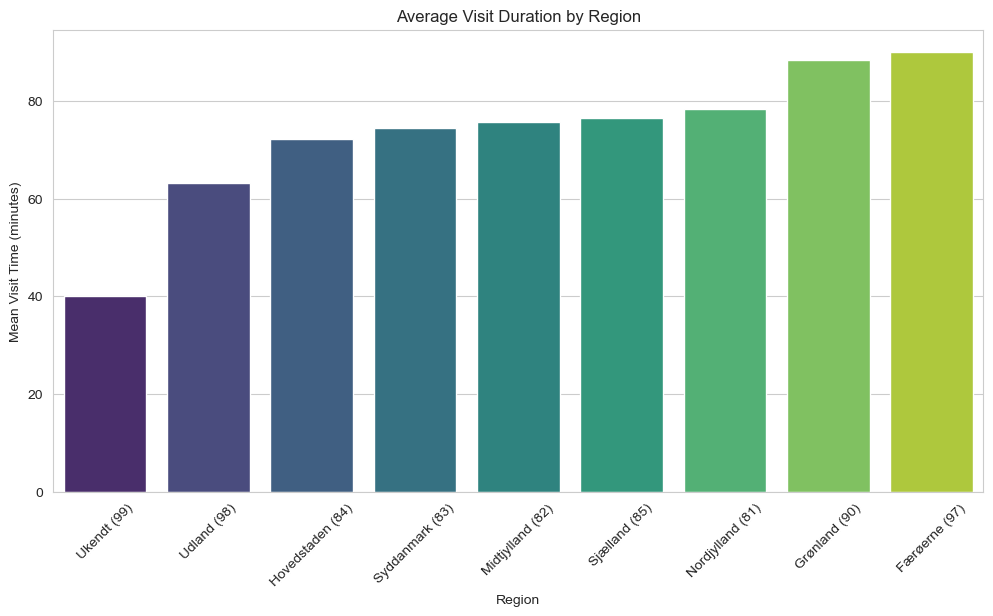

In [21]:
# 5. Bar Plot: Average Visit Duration by Region
plt.figure(figsize=(12, 6))
region_means = patient_df.groupby("Region")["Mean_Visit_Time"].mean().sort_values()
sns.barplot(x=region_means.index, y=region_means.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Visit Duration by Region")
plt.xlabel("Region")
plt.ylabel("Mean Visit Time (minutes)")
plt.show()

C:\Users\Nazareno\AppData\Local\Temp\ipykernel_8168\1583117107.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_means.index, y=age_means.values, palette="viridis")


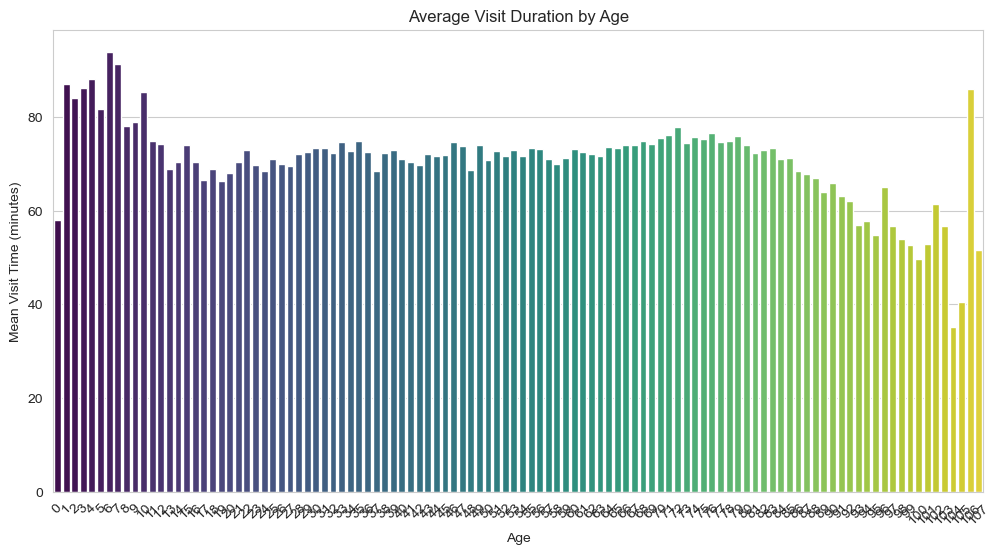

In [22]:
# 6. Bar Plot: Average Visit Duration by Age
plt.figure(figsize=(12, 6))
age_means = patient_df.groupby("Age")["Mean_Visit_Time"].mean().sort_values()
sns.barplot(x=age_means.index, y=age_means.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Visit Duration by Age")
plt.xlabel("Age")
plt.ylabel("Mean Visit Time (minutes)")
plt.show()